In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [43]:
df = pd.read_csv('drug_consumption.data')
columns = ['id', 'age', 'gender', 'education', 'country', 'ethnicity',
           'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive',
           'ss', 'alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis',
           'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh',
           'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']
df.columns = columns
df.drop(columns='semer', inplace=True)

In [44]:
drugs = ["alcohol", "amphet", "amyl", "benzos", "caff", "cannabis", "choc",
    "coke", "crack", "ecstasy", "heroin", "ketamine", "legalh", "lsd",
    "meth", "mushrooms", "nicotine", "vsa"]


illegal_drugs = ["amphet", "amyl", "benzos", "cannabis",
    "coke", "crack", "ecstasy", "heroin", "ketamine", "legalh", "lsd",
    "meth", "mushrooms", "vsa"]

In [47]:
df_target = df[drugs]
df_target.head()

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa
0,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


In [49]:
cat_type = pd.CategoricalDtype(categories=["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"], ordered=True)

df_target['alcohol'].astype(cat_type).dtype
df_d = df[drugs]

In [52]:
user_dict = {'CL0':0, 'CL1':0, 'CL2':1, 'CL3':1, 'CL4':1,'CL5':1, 'CL6':1}

for col in df_d.columns:
  df_d[col] = df_d[col].replace(user_dict)

df_d.head()

/var/folders/s_/yf9hp5d54l9bjwvwpjcwbk200000gn/T/ipykernel_26549/3090705415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[col] = df_d[col].replace(user_dict)


,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa
0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0
1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [53]:
df_d['depressants'] = (df_d['benzos'] + df_d['heroin'] + df_d['ketamine'] + df_d['vsa'] + df_d['amyl']) / 5
df_d['hallucinogens'] = (df_d['lsd'] + df_d['mushrooms'] + df_d['ecstasy']) / 3
df_d['stimulants'] = (df_d['coke'] + df_d['amphet'] + df_d['crack']) / 3
df_d['max_risk_drug'] = df_d[['depressants', 'hallucinogens', 'stimulants']].idxmax(axis=1)

/var/folders/s_/yf9hp5d54l9bjwvwpjcwbk200000gn/T/ipykernel_26549/2865066381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['depressants'] = (df_d['benzos'] + df_d['heroin'] + df_d['ketamine'] + df_d['vsa'] + df_d['amyl']) / 5
/var/folders/s_/yf9hp5d54l9bjwvwpjcwbk200000gn/T/ipykernel_26549/2865066381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['hallucinogens'] = (df_d['lsd'] + df_d['mushrooms'] + df_d['ecstasy']) / 3
/var/folders/s_/yf9hp5d54l9bjwvwpjcwbk200000gn/T/ipykernel_26549/286

In [54]:
df_d.head()

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,...,legalh,lsd,meth,mushrooms,nicotine,vsa,depressants,hallucinogens,stimulants,max_risk_drug
0,1,1,1,0,1,1,1,1,0,1,...,0,1,1,0,1,0,0.4,0.666667,0.666667,hallucinogens
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0.0,0.000000,0.000000,depressants
2,1,0,0,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0.4,0.000000,0.333333,depressants
3,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,1,0,0.0,0.333333,0.000000,hallucinogens
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0.0,0.000000,0.000000,depressants


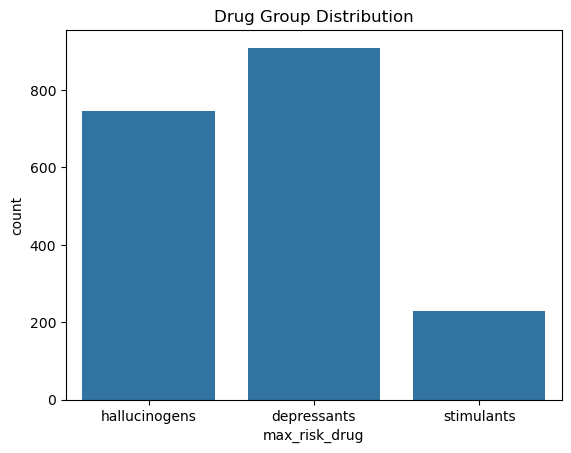

In [86]:
# Visualize target class distribution
sns.countplot(x='max_risk_drug', data=df_d)
plt.title("Drug Group Distribution")
plt.show()

In [73]:
df_features

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [55]:
df_personality = df_features.drop(columns=['age', 'gender', 'education','country' ,'ethnicity'])

In [57]:
def split(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

X = df_features
Y = df_d['max_risk_drug']

X_train, X_test, y_train, y_test = split(X, Y)

In [58]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(6, len(s)+1))

In [62]:
ps = list(powerset(new_features))

def featurelogreg(features):
  X_train, X_test, y_train, y_test = split(X[features], Y)
  my_modelCV = LogisticRegressionCV(cv=4, random_state=42, solver='lbfgs')
  my_modelCV.fit(X_train, y_train)

  test_accuracy = np.mean(my_modelCV.predict(X_test) == y_test)
  return test_accuracy

featurelogreg(new_features)

0.7241379310344828

In [79]:
best_accuracy = 0
best_features = None
ps = list(powerset(new_features))

for i in range(1, len(ps)):
  if i % 10 == 0:
    print(i)
  l = list(ps[i])
  acc = featurelogreg(l)
  if acc > best_accuracy:
    best_accuracy = acc
    best_features = l

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020


In [81]:
best_accuracy, best_features

(0.7427055702917772, ['age', 'education', 'country', 'oscore', 'ascore', 'ss'])

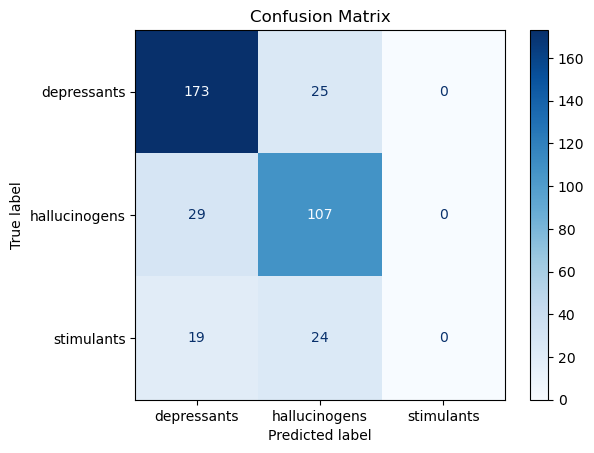

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_best = X[best_features]

# Split the data again with the best features
X_train, X_test, y_train, y_test = split(X_best, Y)

# Train the logistic regression model
final_model = LogisticRegressionCV(cv=4, random_state=42, solver='lbfgs')
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [67]:
drugs = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis',
           'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh',
           'lsd', 'meth', 'mushrooms', 'nicotine', 'vsa']

recent_use_threshold = ["CL4", "CL5", "CL6"]

# Helper function to map CLx values to binary
def is_recent_use(value):
    return 1 if value in recent_use_threshold else 0

for col in drugs:
    df[col] = df[col].apply(is_recent_use)

print(df.head(7))

   id      age   gender  education  country  ethnicity   nscore   escore  \
0   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
1   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
2   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
3   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
4   6  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
5   7  1.09449 -0.48246    1.16365 -0.57009   -0.31685 -0.46725 -1.09207   
6   8  0.49788 -0.48246   -1.73790  0.96082   -0.31685 -1.32828  1.93886   

    oscore   ascore  ...  crack  ecstasy  heroin  ketamine  legalh  lsd  meth  \
0  1.43533  0.76096  ...      0        1       0         0       0    0     0   
1 -0.84732 -1.62090  ...      0        0       0         0       0    0     0   
2 -0.01928  0.59042  ...      0        0       0         0       0    0     0   
3 -0.45174 -0.30172  ...      0        0       0         0       0 

In [68]:
non_illegal_drugs = ['alcohol', 'caff', 'nicotine']

df['recent_non_illegal_usage'] = df[non_illegal_drugs].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

non_illegal_users_percentage = (df['recent_non_illegal_usage'].sum() / len(df)) * 100
print(f"Percentage of people who have used non-illegal drugs in the last year: {non_illegal_users_percentage:.10f}%")


Percentage of people who have used non-illegal drugs in the last year: 98.2484076433%


In [69]:
illegal_drugs = ['amphet', 'amyl', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy',
                 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'vsa']

df['recent_illegal_usage'] = df[illegal_drugs].apply(lambda row: 1 if row.any() else 0, axis=1)

print(df[['recent_illegal_usage'] + illegal_drugs].head())
percentage_illegal_users = df['recent_illegal_usage'].mean() * 100

print(f"Percentage of people who have used illegal drugs in the last month: {percentage_illegal_users:.2f}%")

   recent_illegal_usage  amphet  amyl  benzos  cannabis  coke  crack  ecstasy  \
0                     1       0     0       0         1     0      0        1   
1                     0       0     0       0         0     0      0        0   
2                     0       0     0       0         0     0      0        0   
3                     0       0     0       0         0     0      0        0   
4                     0       0     0       0         0     0      0        0   

   heroin  ketamine  legalh  lsd  meth  mushrooms  vsa  
0       0         0       0    0     0          0    0  
1       0         0       0    0     0          0    0  
2       0         0       0    0     0          0    0  
3       0         0       0    0     0          0    0  
4       0         0       0    0     0          0    0  
Percentage of people who have used illegal drugs in the last month: 52.87%


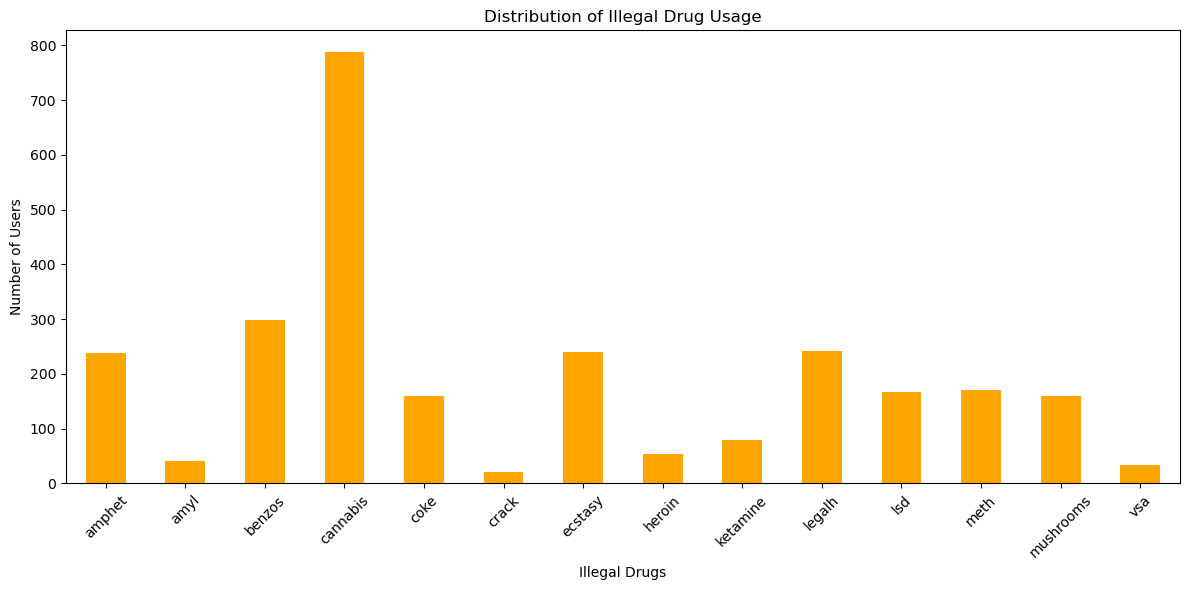

In [70]:
illegal_drugs = ['amphet', 'amyl', 'benzos', 'cannabis', 'coke', 'crack',
                 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth',
                 'mushrooms', 'vsa']

illegal_drug_counts = df[illegal_drugs].sum()

plt.figure(figsize=(12, 6))
illegal_drug_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Illegal Drug Usage')
plt.xlabel('Illegal Drugs')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
print(df[non_illegal_drugs].head(70))


    alcohol  caff  nicotine
0         1     1         1
1         1     1         0
2         1     1         0
3         1     1         0
4         0     1         1
..      ...   ...       ...
65        1     0         0
66        1     1         1
67        1     1         0
68        1     0         0
69        1     1         0

[70 rows x 3 columns]


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       191
           1       0.70      0.70      0.70       186

    accuracy                           0.71       377
   macro avg       0.71      0.71      0.71       377
weighted avg       0.71      0.71      0.71       377

Confusion Matrix:
 [[136  55]
 [ 55 131]]


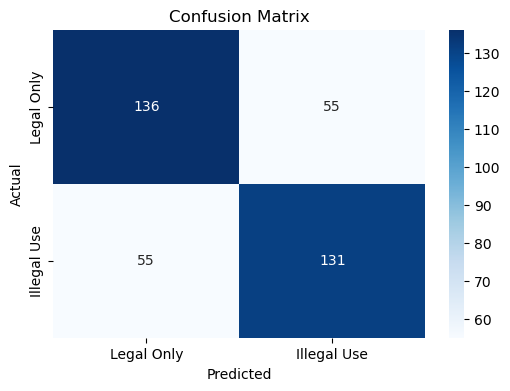

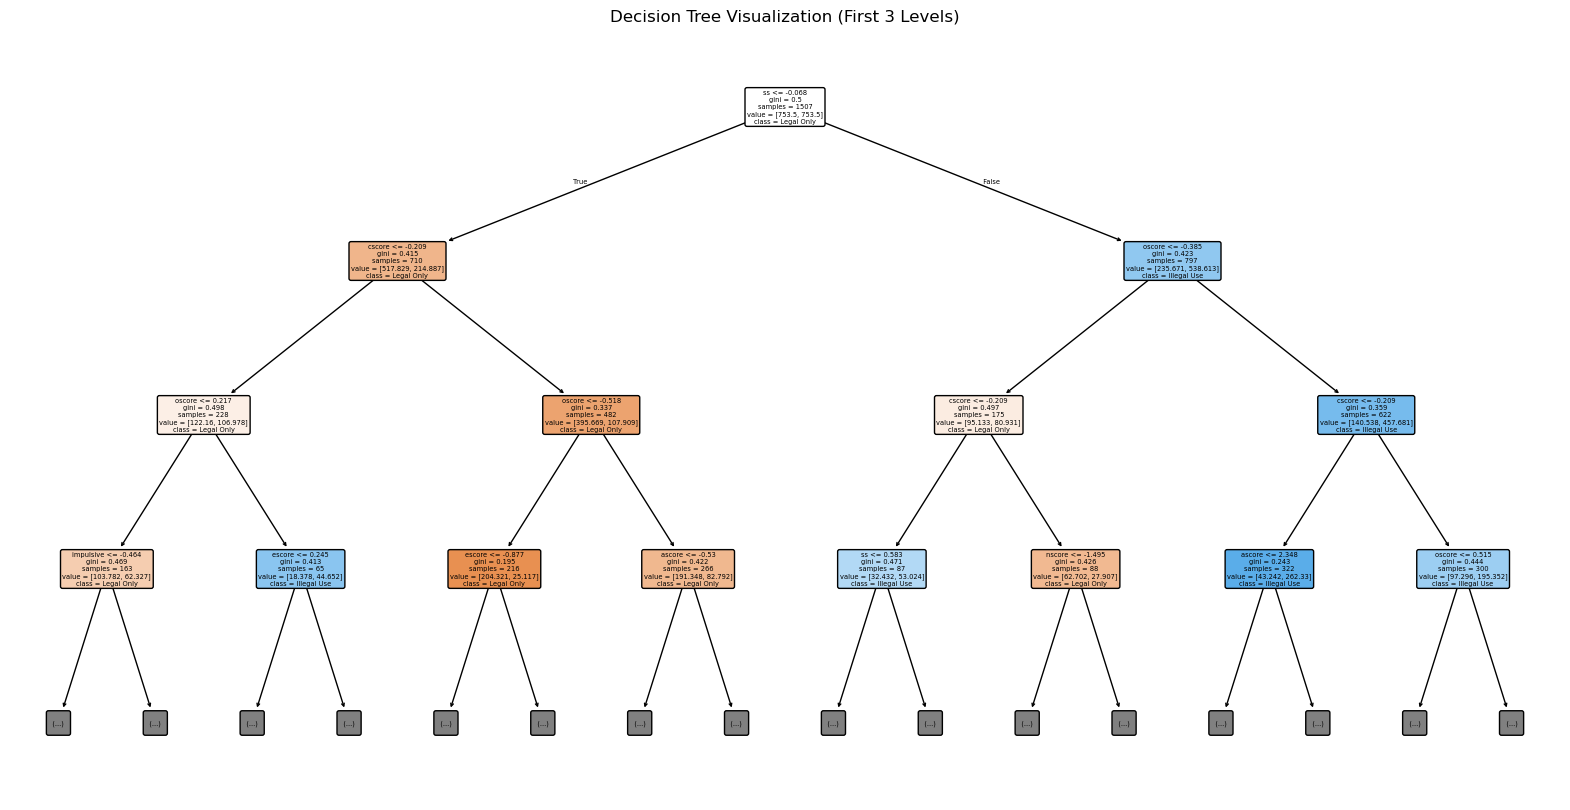

/var/folders/s_/yf9hp5d54l9bjwvwpjcwbk200000gn/T/ipykernel_26549/3728081214.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


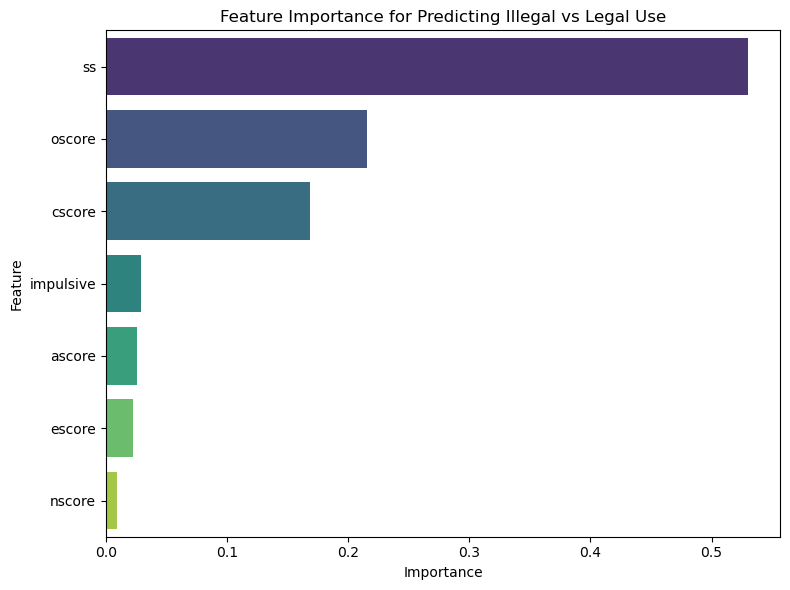

In [72]:
# If a person has used illegal drugs (recent_illegal_usage = 1), categorize as 1 (Illegal Use); otherwise, 0 (Legal Only)
df['usage_category'] = df['recent_illegal_usage']  # Binary: 1 for Illegal Use, 0 for Legal Only


personality_features = ['nscore', 'escore', 'oscore', 'ascore', 'cscore', 'ss', 'impulsive']  
X = df[personality_features]
y = df['usage_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cart_model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4, class_weight="balanced")
cart_model.fit(X_train, y_train)

y_pred = cart_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legal Only', 'Illegal Use'],
            yticklabels=['Legal Only', 'Illegal Use'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=personality_features, class_names=['Legal Only', 'Illegal Use'],
          filled=True, rounded=True, max_depth=3)  # Visualize up to level 4
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.show()

feature_importance = pd.DataFrame({'Feature': personality_features, 'Importance': cart_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Predicting Illegal vs Legal Use')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
